In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing

In [25]:
#creating a KMeans object
kmeans = KMeans(n_clusters = 100)

In [26]:
df= pd.read_csv("data.csv")

In [27]:
x_array = np.array([df['tempo'],df['loudness']])
normalized_X = preprocessing.normalize(x_array)

In [28]:
df = df.drop(['tempo','release_date','explicit','duration_ms','loudness'],axis=1)

In [29]:
df.insert(11,'tempo',normalized_X[0])
df.insert(12,'loudness',normalized_X[1])

In [30]:
df.insert(13,'title+artist',df['title']+ ' by '+df['artist_name'])

In [31]:
df=df.drop('year',axis=1)

In [32]:
X=np.array(df.drop(['title+artist','artist_name','id','title'],axis=1))

In [33]:
y=np.array(df['id'])

In [34]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=100, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [37]:
clusters= kmeans.cluster_centers_

In [38]:
print(clusters)

[[ 0.40208177  0.53200433  0.52869828 ... -0.0022293   0.06866727
   0.5593745 ]
 [ 0.858137    0.5021799   0.26613139 ... -0.00293438  0.18193382
   0.52616273]
 [ 0.2712553   0.60983053  0.62069129 ... -0.00151533  0.09684623
   0.5154029 ]
 ...
 [ 0.45637301  0.5108841   0.5140896  ... -0.0023056   0.05837339
   0.57481519]
 [ 0.23223577  0.70627885  0.61707135 ... -0.00120878  0.12316154
   0.52220577]
 [ 0.50706604  0.52645529  0.47415264 ... -0.00236479  0.06866847
   0.56674602]]


In [39]:
y_km = kmeans.fit_predict(X)

In [40]:
y_km

array([50,  7, 72, ..., 61, 79, 12])

In [41]:
X

array([[ 9.95000000e-01,  7.08000000e-01,  1.95000000e-01, ...,
        -2.37327097e-03,  5.06000000e-02,  7.79000000e-01],
       [ 9.94000000e-01,  3.79000000e-01,  1.35000000e-02, ...,
        -5.43362183e-03,  4.62000000e-02,  7.67000000e-02],
       [ 6.04000000e-01,  7.49000000e-01,  2.20000000e-01, ...,
        -3.80471925e-03,  9.29000000e-01,  8.80000000e-01],
       ...,
       [ 5.38000000e-01,  5.14000000e-01,  5.39000000e-01, ...,
        -1.78205380e-03,  1.05000000e-01,  1.53000000e-01],
       [ 7.14000000e-02,  6.46000000e-01,  7.61000000e-01, ...,
        -4.88288853e-04,  3.85000000e-02,  4.72000000e-01],
       [ 1.09000000e-01,  5.12000000e-01,  4.28000000e-01, ...,
        -1.41063346e-03,  2.71000000e-02,  3.66000000e-01]])

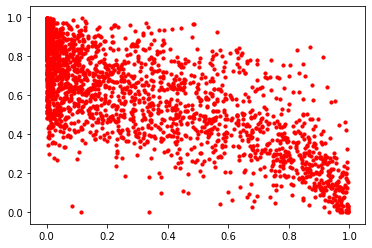

In [47]:
plt.scatter(X[y_km==0,0], X[y_km == 0,2], s = 10, color = 'red')